In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('D:\Dev\Jockey\Heart Disease Prediction\Heart_Disease_Prediction.csv')

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\MasAm\AppData\Local\Temp\ipykernel_6292\1594924490.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\Dev\Jockey\Heart Disease Prediction\Heart_Disease_Prediction.csv')


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

<Axes: xlabel='Heart Disease', ylabel='count'>

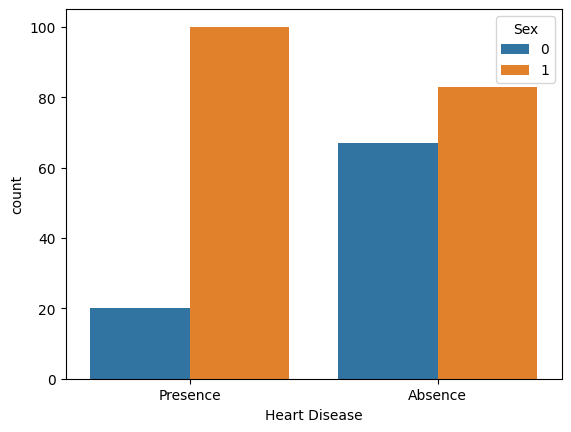

In [15]:
sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)

In [16]:
# sns.barplot(x=df['Heart Disease'],y=df['Exercise angina'],data=df)

# sns.barplot(x=df['Sex'],y=df['Exercise angina'],hue='Sex',data=df)

# sns.barplot(x=df['Sex'],y=df['Cholesterol'],hue='Sex',data=df)

# sns.barplot(x=df['Heart Disease'],y=df['Cholesterol'],hue='Heart Disease',data=df)

# sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)

# sns.lineplot(x=df['Age'],y=df['ST depression'],data=df)

# sns.barplot(x=df['Heart Disease'],y=df['ST depression'],data=df)

# sns.heatmap(df.corr())

In [17]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
std_data = scaler.transform(X)
X = std_data

In [19]:
# Split the data into training and testing sets with 80% ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9074074074074074


In [28]:
import numpy as np
input = (39, 1, 4, 118, 219, 0, 0, 140, 0, 1.2, 2, 0, 0)
as_array = np.array(input)
reshape = as_array.reshape(1, -1)
std_data = scaler.transform(reshape)

prediction = classifier.predict(std_data)
y = classifier.predict_proba(std_data)
print(prediction, y)

[1] [[0. 1.]]


In [26]:
import pickle
filename = 'HD_Machine.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [27]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']